Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['0'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 10 most common venues

In [15]:
London_neig_grouped_mean.shape

(246, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Abbey Wood----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Albany Park----
                venue  freq
0                food  0.25
1           nightlife  0.25
2               shops  0.25
3              travel  0.25
4  arts_entertainment  0.00


----Aldborough Hatch----
                venue  freq
0                food   1.0
1  arts_entertainment   0.0
2            building   0.0
3           education   0.0
4               event   0.0


----Alperton----
                venue  freq
0                food  0.62
1               shops  0.25
2            building  0.12
3  arts_entertainment  0.00
4           education  0.00


----Anerley----
            venue  freq
0          travel  0.31
1  parks_outdoors  0.19
2           shops  0.19
3            food  0.12
4       nightlife  0.12


----Aperfield----
                venue  freq
0  arts_entertainment   0.5
1  

                venue  freq
0           nightlife  0.43
1                food  0.29
2      parks_outdoors  0.29
3  arts_entertainment  0.00
4            building  0.00


----Cranham----
                venue  freq
0                food   0.6
1      parks_outdoors   0.2
2               shops   0.2
3  arts_entertainment   0.0
4            building   0.0


----Crayford----
                venue  freq
0               shops  0.44
1                food  0.31
2              travel  0.12
3  arts_entertainment  0.06
4           nightlife  0.06


----Crews Hill----
                venue  freq
0      parks_outdoors  0.50
1  arts_entertainment  0.25
2               shops  0.25
3            building  0.00
4           education  0.00


----Cricklewood----
                venue  freq
0                food  0.59
1               shops  0.19
2              travel  0.15
3           nightlife  0.07
4  arts_entertainment  0.00


----Crofton Park----
                venue  freq
0                food  0.39
1

                venue  freq
0                food  0.46
1           nightlife  0.23
2  arts_entertainment  0.08
3      parks_outdoors  0.08
4               shops  0.08


----Hainault----
                venue  freq
0               shops   0.4
1                food   0.2
2           nightlife   0.2
3              travel   0.2
4  arts_entertainment   0.0


----Harefield----
                venue  freq
0                food   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Harlesden----
            venue  freq
0            food  0.40
1           shops  0.30
2          travel  0.20
3       nightlife  0.05
4  parks_outdoors  0.05


----Harlington----
       venue  freq
0       food  0.33
1     travel  0.22
2  nightlife  0.17
3      shops  0.17
4   building  0.06


----Harmondsworth----
            venue  freq
0       nightlife  0.33
1            food  0.22
2          travel  0.22
3  parks_outdoors  0.11
4           sh

                venue  freq
0  arts_entertainment  0.25
1               event  0.25
2      parks_outdoors  0.25
3               shops  0.25
4            building  0.00


----Neasden----
                venue  freq
0              travel  0.75
1                food  0.25
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----New Cross----
                venue  freq
0                food  0.56
1               shops  0.11
2              travel  0.11
3  arts_entertainment  0.06
4            building  0.06


----New Eltham----
                venue  freq
0                food  0.29
1               shops  0.29
2  arts_entertainment  0.14
3           nightlife  0.14
4              travel  0.14


----New Malden----
            venue  freq
0            food  0.59
1           shops  0.27
2  parks_outdoors  0.05
3        building  0.03
4       nightlife  0.03


----Newbury Park----
                venue  freq
0               shops   0.8
1              travel   0

4           education   0.0


----Stamford Hill----
                venue  freq
0                food  0.33
1               shops  0.33
2           nightlife  0.22
3              travel  0.11
4  arts_entertainment  0.00


----Stanmore----
                venue  freq
0                food  0.69
1               shops  0.23
2           nightlife  0.08
3  arts_entertainment  0.00
4            building  0.00


----Stoke Newington----
            venue  freq
0            food  0.52
1       nightlife  0.26
2           shops  0.12
3          travel  0.07
4  parks_outdoors  0.02


----Stonebridge----
                venue  freq
0                food  0.33
1  arts_entertainment  0.17
2      parks_outdoors  0.17
3               shops  0.17
4              travel  0.17


----Sudbury----
                venue  freq
0                food  0.50
1              travel  0.38
2               shops  0.12
3  arts_entertainment  0.00
4            building  0.00


----Sundridge----
                venue  freq

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,shops,parks_outdoors,travel,nightlife,food
4,Albany Park,travel,shops,nightlife,food,parks_outdoors
5,Aldborough Hatch,food,travel,shops,parks_outdoors,nightlife
8,Alperton,food,shops,building,travel,parks_outdoors
9,Anerley,travel,shops,parks_outdoors,nightlife,food


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,0.0000,0.000,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
4,0.0000,0.000,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
5,0.0000,0.000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.125,0.0,0.0,0.625000,0.000000,0.000000,0.250000,0.000000
9,0.0625,0.000,0.0,0.0,0.125000,0.125000,0.187500,0.187500,0.312500
...,...,...,...,...,...,...,...,...,...
506,0.2000,0.200,0.0,0.0,0.600000,0.000000,0.000000,0.000000,0.000000
510,0.0000,0.000,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,0.0000,0.000,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
513,0.0000,0.000,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

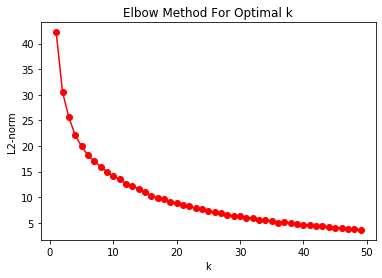

3.6017928810542266

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N051=np.empty([49,2])
elbow_N051=pd.DataFrame(elbow_N051,columns=['K','SSD'])
elbow_N051['K']=K
elbow_N051['SSD']=SSD
elbow_N051.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N051.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([1, 2, 3, 3, 2, 4, 4, 2, 3, 4, 0, 3, 3, 0, 0, 3, 0, 2, 3, 4, 0, 0,
       0, 3, 4, 3, 4, 3, 0, 4, 3, 0, 3, 1, 4, 4, 1, 4, 3, 3, 0, 2, 4, 3,
       3, 3, 3, 1, 0, 0, 3, 4, 3, 0, 1, 3, 4, 4, 0, 2, 4, 3, 4, 0, 4, 4,
       1, 3, 4, 2, 3, 3, 3, 2, 4, 4, 3, 2, 4, 3, 0, 0, 0, 3, 3, 3, 3, 4,
       2, 3, 4, 3, 4, 3, 0, 4, 1, 4, 0, 3, 3, 4, 4, 3, 3, 0, 0, 3, 2, 3,
       0, 0, 3, 3, 3, 3, 2, 3, 0, 2, 3, 2, 1, 4, 3, 2, 0, 3, 4, 4, 3, 4,
       0, 1, 2, 3, 0, 3, 1, 4, 3, 4, 1, 0, 0, 4, 1, 1, 1, 2, 3, 4, 3, 0,
       4, 1, 3, 0, 4, 0, 1, 2, 3, 3, 4, 1, 3, 4, 4, 2, 4, 0, 4, 3, 3, 3,
       4, 3, 2, 2, 0, 4, 3, 2, 3, 4, 3, 3, 2, 2, 1, 3, 3, 0, 0, 3, 4, 4,
       4, 3, 4, 0, 3, 4, 3, 3, 4, 2, 3, 3, 0, 3, 1, 4, 2, 3, 3, 3, 2, 4,
       3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 2, 0, 3, 0, 3, 3, 4, 3, 3, 3, 3,
       3, 0, 0, 2], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N051=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N051=kclusters_N051.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
83,Hillingdon,Hayes,51.377784,0.0103,0,shops,travel,food,parks_outdoors,nightlife
97,Bromley,Bromley Common,51.384100,0.0349,0,shops,parks_outdoors,travel,nightlife,food
129,Greenwich,Kidbrooke,51.465000,0.0330,0,shops,travel,food,arts_entertainment,parks_outdoors
68,Bromley,Biggin Hill,51.312700,0.0336,0,shops,parks_outdoors,travel,nightlife,food
67,Bromley,Bickley,51.400300,0.0466,0,shops,travel,food,arts_entertainment,parks_outdoors


Finally, let's visualize the resulting clusters

In [29]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.1).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_borough_neig_clusters_CATEGORY05-1.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
83,Hillingdon,Hayes,51.377784,0.010300,0,shops,travel,food,parks_outdoors,nightlife
97,Bromley,Bromley Common,51.384100,0.034900,0,shops,parks_outdoors,travel,nightlife,food
129,Greenwich,Kidbrooke,51.465000,0.033000,0,shops,travel,food,arts_entertainment,parks_outdoors
68,Bromley,Biggin Hill,51.312700,0.033600,0,shops,parks_outdoors,travel,nightlife,food
67,Bromley,Bickley,51.400300,0.046600,0,shops,travel,food,arts_entertainment,parks_outdoors
255,Redbridge,Newbury Park,51.576700,0.086200,0,shops,travel,parks_outdoors,nightlife,food
33,Bexley,Belvedere,51.485600,0.154100,0,shops,event,travel,parks_outdoors,nightlife
200,Hillingdon,Yeading,51.530300,-0.391600,0,shops,travel,nightlife,parks_outdoors,food
182,Havering,South Hornchurch,51.530000,0.185000,0,shops,food,travel,parks_outdoors,nightlife
36,Bexley,Blackfen,51.450800,0.092550,0,shops,travel,parks_outdoors,nightlife,food


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
101,Bromley,Penge,51.417000,-0.062000,1,parks_outdoors,shops,travel,nightlife,food
196,Hillingdon,Northwood,51.601000,-0.417600,1,parks_outdoors,building,arts_entertainment,travel,shops
218,Kingston upon Thames,Motspur Park,51.410000,-0.250000,1,parks_outdoors,shops,food,travel,nightlife
105,Bromley,Mottingham,51.433700,0.036500,1,shops,parks_outdoors,event,arts_entertainment,travel
230,Lewisham,Downham,51.425700,0.005800,1,parks_outdoors,shops,building,travel,nightlife
70,Bromley,Locksbottom,51.370800,0.060800,1,shops,parks_outdoors,nightlife,travel,food
0,Barking and Dagenham,Chadwell Heath,51.575700,0.144000,1,parks_outdoors,shops,nightlife,travel,food
112,Enfield,Crews Hill,51.678000,-0.097000,1,parks_outdoors,shops,arts_entertainment,travel,nightlife
11,Bexley,Abbey Wood,51.486400,0.110900,1,shops,parks_outdoors,travel,nightlife,food
12,Greenwich,Abbey Wood,51.486400,0.110900,1,shops,parks_outdoors,travel,nightlife,food


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
86,Bromley,Leaves Green,51.335384,0.029520,2,nightlife,travel,parks_outdoors,shops,food
94,Bromley,Keston,51.350668,0.028796,2,travel,nightlife,shops,parks_outdoors,food
92,Bromley,Keston,51.362500,0.027100,2,travel,nightlife,shops,parks_outdoors,food
93,Bromley,Keston,51.351107,0.029955,2,travel,nightlife,shops,parks_outdoors,food
204,Hillingdon,Ickenham,51.558000,-0.448400,2,travel,shops,parks_outdoors,nightlife,food
176,Havering,Wennington,51.506100,0.218900,2,travel,shops,parks_outdoors,nightlife,food
134,Greenwich,Plumstead,51.486990,0.079810,2,travel,nightlife,food,shops,parks_outdoors
123,Enfield,Enfield Lock,51.668600,-0.026000,2,travel,parks_outdoors,food,shops,nightlife
183,Havering,Upminster,51.555743,0.251239,2,food,travel,shops,nightlife,parks_outdoors
199,Hillingdon,Yiewsley,51.512619,-0.472610,2,travel,shops,nightlife,parks_outdoors,food


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
173,Sutton,Belmont,51.601225,-0.318101,3,food,shops,nightlife,travel,parks_outdoors
262,Sutton,Cheam,51.360000,-0.210000,3,food,shops,nightlife,travel,parks_outdoors
172,Harrow,Belmont,51.601225,-0.318101,3,food,shops,nightlife,travel,parks_outdoors
175,Havering,Harold Park,51.600000,0.243000,3,shops,food,travel,parks_outdoors,nightlife
260,Redbridge,South Woodford,51.593453,0.025717,3,food,shops,nightlife,travel,building
...,...,...,...,...,...,...,...,...,...,...
124,Enfield,Enfield Highway,51.662000,-0.041000,3,food,shops,nightlife,travel,parks_outdoors
125,Enfield,Winchmore Hill,51.633941,-0.101003,3,food,travel,nightlife,shops,parks_outdoors
3,Enfield,Cockfosters,51.652700,-0.156000,3,food,shops,nightlife,travel,parks_outdoors
126,Enfield,Edmonton,51.622000,-0.048500,3,food,shops,travel,parks_outdoors,nightlife


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
269,Wandsworth,Nine Elms,51.480000,-0.140000,4,food,shops,nightlife,travel,building
237,Lewisham,Southend,51.420346,-0.021865,4,shops,parks_outdoors,food,arts_entertainment,travel
273,Wandsworth,Wandsworth,51.455000,-0.192000,4,shops,food,nightlife,travel,parks_outdoors
48,Brent,Kingsbury,51.582600,-0.274300,4,food,shops,parks_outdoors,nightlife,building
49,Brent,Preston,51.570934,-0.294914,4,food,shops,nightlife,travel,arts_entertainment
...,...,...,...,...,...,...,...,...,...,...
95,Bromley,Downe,51.335900,0.053500,4,nightlife,parks_outdoors,arts_entertainment,travel,shops
197,Hillingdon,Ruislip,51.576000,-0.433000,4,food,shops,nightlife,arts_entertainment,travel
193,Havering,Rainham,51.517700,0.194800,4,shops,parks_outdoors,food,travel,nightlife
209,Hillingdon,Harmondsworth,51.486500,-0.479600,4,nightlife,travel,food,shops,parks_outdoors


In [41]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N051=np.empty([kclusters,2])                                         
Centroids_N051=pd.DataFrame(Centroids_N051, columns=['x-Latitude','y-Longitude']) 
Centroids_N051['x-Latitude']=x
Centroids_N051['y-Longitude']=y
Centroids_N051.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N051.xlsx')

In [42]:
Centroids_N051

,x-Latitude,y-Longitude
0,51.464229,0.007526
1,51.528980,0.000593
2,51.483878,-0.095205
3,51.517469,-0.102157
4,51.490540,-0.068775


In [43]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,0,2
building,0,0,0,0,1
education,0,0,0,0,0
event,0,0,0,0,0
food,0,0,4,105,30
nightlife,0,0,1,0,10
parks_outdoors,0,15,1,1,1
shops,47,8,0,5,18
travel,0,0,27,0,0


In [44]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N051=kclusters_N051.append(p_score)

In [45]:
kclusters_N051.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N051.xlsx')
kclusters_N051

0    43.000000
1    19.000000
2    29.000000
3    96.000000
4    59.000000
5     0.235253
6     0.811594
dtype: float64